In [2]:
install.packages('ggplot2')

also installing the dependencies 'lattice', 'colorspace', 'nlme', 'Matrix', 'farver', 'labeling', 'munsell', 'RColorBrewer', 'viridisLite', 'gtable', 'isoband', 'mgcv', 'scales', 'withr'




  There are binary versions available but the source versions are later:
        binary source needs_compilation
Matrix   1.3-3  1.3-4              TRUE
mgcv    1.8-35 1.8-36              TRUE
ggplot2  3.3.3  3.3.4             FALSE

  Binaries will be installed
package 'lattice' successfully unpacked and MD5 sums checked
package 'colorspace' successfully unpacked and MD5 sums checked
package 'nlme' successfully unpacked and MD5 sums checked
package 'Matrix' successfully unpacked and MD5 sums checked
package 'farver' successfully unpacked and MD5 sums checked
package 'labeling' successfully unpacked and MD5 sums checked
package 'munsell' successfully unpacked and MD5 sums checked
package 'RColorBrewer' successfully unpacked and MD5 sums checked
package 'viridisLite' successfully unpacked and MD5 sums checked
package 'gtable' successfully unpacked and MD5 sums checked
package 'isoband' successfully unpacked and MD5 sums checked
package 'mgcv' successfully unpacked and MD5 sums checked


installing the source package 'ggplot2'



In [3]:
require(neuralnet)
require(nnet)
require(ggplot2)
set.seed(10)


Loading required package: ggplot2


In [4]:
wines <- read.csv("wines.csv")
names(wines) <- c("label", "Alcohol","Malic_acid", "Ash",
                  "Alcalinity_of_ash", "Magnesium", "Total_phenols",
                  "Flavanoids", "Nonflavanoid_phenols",
                  "Proanthocyanins", "Color_intensity",
                  "Hue", "OD280_OD315_of_diluted_wines","Proline")
head(wines)


label,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315_of_diluted_wines,Proline
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


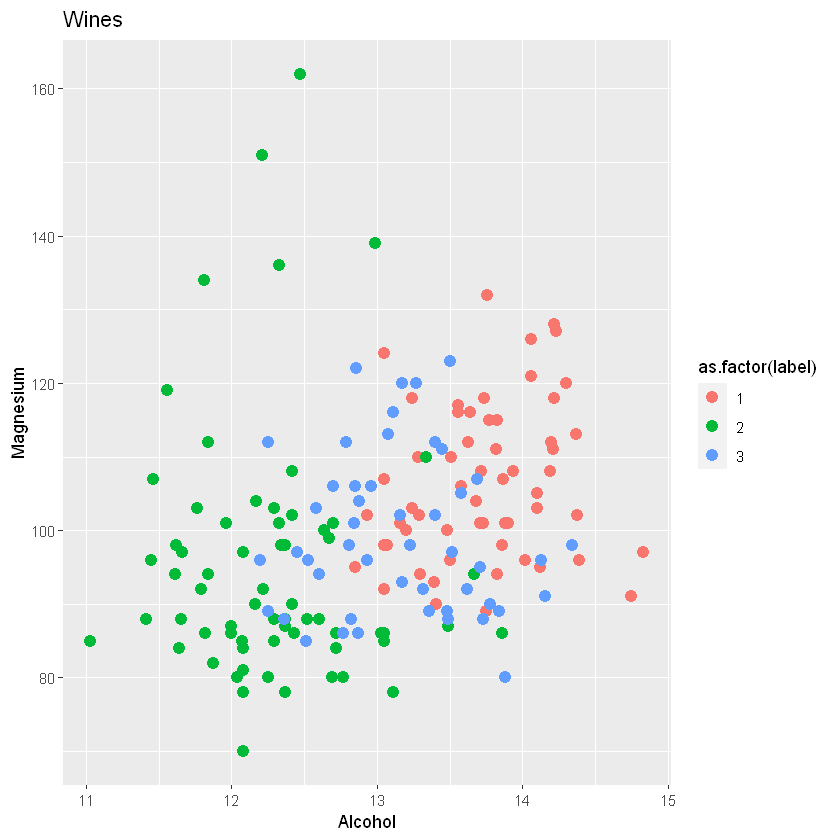

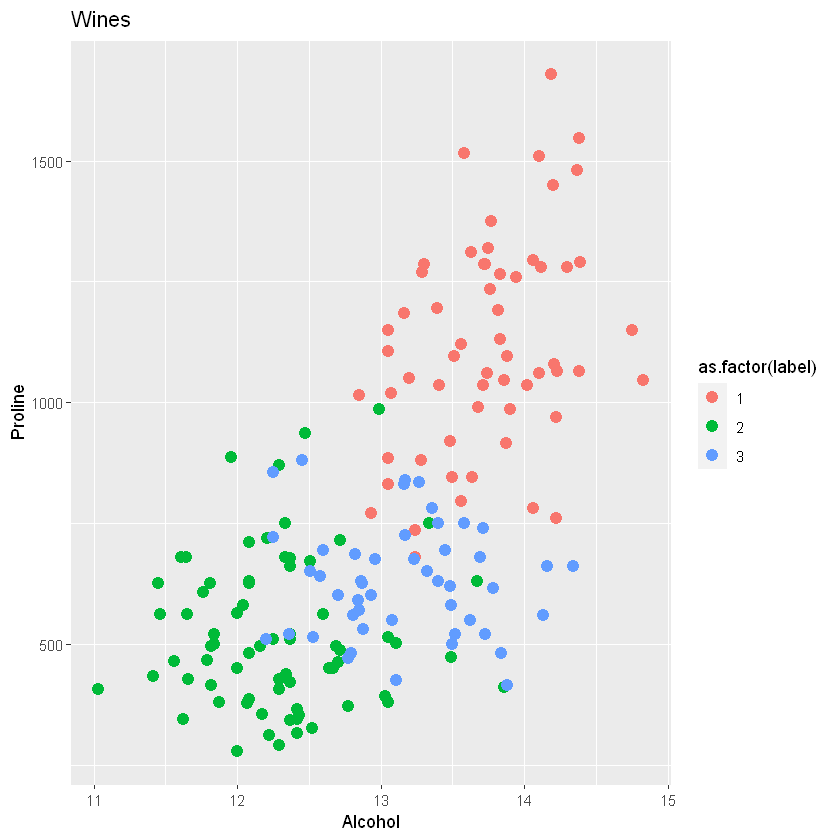

In [5]:
# Let’s have a look at a plot of some of the variables
plt1 <- ggplot(wines, aes(x = Alcohol, y = Magnesium, colour = as.factor(label))) + geom_point(size=3) + ggtitle("Wines")
plt2 <- ggplot(wines, aes(x = Alcohol, y = Proline, colour = as.factor(label))) +
    geom_point(size=3) + ggtitle("Wines")
plt1
plt2


In [6]:
# Encode as a one hot vector multilabel data
train <- cbind(wines[, 2:14], class.ind(as.factor(wines$label)))


In [7]:
# Set labels name
names(train) <- c(names(wines)[2:14],"l1","l2","l3")


In [8]:
# Standardize the predictors in the [0−1]">[0−1]  interval with lapply
# Scale data
scl <- function(x){ (x - min(x))/(max(x) - min(x)) }
train[, 1:13] <- data.frame(lapply(train[, 1:13], scl))
head(train)


Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315_of_diluted_wines,Proline,l1,l2,l3
0.8421053,0.1916996,0.5721925,0.25773196,0.6195652,0.6275862,0.5738397,0.2830189,0.5930599,0.3720137,0.4552846,0.9706960,0.5613409,1,0,0
0.5710526,0.2055336,0.4171123,0.03092784,0.3260870,0.5758621,0.5105485,0.2452830,0.2744479,0.2645051,0.4634146,0.7802198,0.5506419,1,0,0
0.5605263,0.3201581,0.7005348,0.41237113,0.3369565,0.6275862,0.6118143,0.3207547,0.7570978,0.3754266,0.4471545,0.6959707,0.6469330,1,0,0
0.8789474,0.2391304,0.6096257,0.31958763,0.4673913,0.9896552,0.6645570,0.2075472,0.5583596,0.5563140,0.3089431,0.7985348,0.8573466,1,0,0
0.5815789,0.3656126,0.8074866,0.53608247,0.5217391,0.6275862,0.4957806,0.4905660,0.4447950,0.2593857,0.4552846,0.6080586,0.3259629,1,0,0
0.8342105,0.2015810,0.5828877,0.23711340,0.4565217,0.7896552,0.6434599,0.3962264,0.4921136,0.4667235,0.4634146,0.5787546,0.8359486,1,0,0


In [10]:
# Set up formula
n <- names(train)
f <- as.formula(paste("l1 + l2 + l3 ~", paste(n[!n %in% c("l1","l2","l3")], collapse = " + ")))



In [11]:
f

l1 + l2 + l3 ~ Alcohol + Malic_acid + Ash + Alcalinity_of_ash + 
    Magnesium + Total_phenols + Flavanoids + Nonflavanoid_phenols + 
    Proanthocyanins + Color_intensity + Hue + OD280_OD315_of_diluted_wines + 
    Proline

In [12]:
nn <- neuralnet(f, data = train, hidden = c(13, 10, 3), act.fct = "logistic",linear.output = FALSE,lifesign = "minimal")

hidden: 13, 10, 3    thresh: 0.01    rep: 1/1    steps:      89	error: 0.02455	time: 0.1 secs


In [13]:
plot(nn)

In [14]:
# Compute predictions
pr.nn <- compute(nn, train[, 1:13])


In [15]:
# Extract results
pr.nn_ <- pr.nn$net.result
head(pr.nn_)


0.9919754,0.003020934,5.042477e-06
0.9913000,0.003559137,4.524784e-06
0.9920582,0.003003758,4.938348e-06
0.9923104,0.002871484,5.158712e-06
0.9872282,0.005115707,5.583214e-06
0.9923760,0.002874163,4.903709e-06


In [16]:
# Accuracy (training set)
original_values <- max.col(train[, 14:16])
pr.nn_2 <- max.col(pr.nn_)
mean(pr.nn_2 == original_values)


[1] 1

In [17]:
# Set seed for reproducibility purposes
set.seed(500)


In [18]:
# 10 fold cross validation
k <- 10
# Results from cv
outs <- NULL


In [19]:
# Train test split proportions
proportion <- 0.95 # Set to 0.995 for LOOCV


In [20]:
# Crossvalidate, go!
for(i in 1:k)
{
    index <- sample(1:nrow(train), round(proportion*nrow(train)))
    train_cv <- train[index, ]
    test_cv <- train[-index, ]
    nn_cv <- neuralnet(f,
                        data = train_cv,
                        hidden = c(13, 10, 3),
                        act.fct = "logistic",
                        linear.output = FALSE)
    
        pr.nn <- compute(nn_cv, test_cv[, 1:13]) # Compute predictions
    
    pr.nn_ <- pr.nn$net.result # Extract results
    # Accuracy (test set)
    original_values <- max.col(test_cv[, 14:16])
    pr.nn_2 <- max.col(pr.nn_)
    outs[i] <- mean(pr.nn_2 == original_values)
}
mean(outs) # 98.8% - Great!!


[1] 1